##### Nathan Kosoi Lamont
##### Rubén Andrés Baca González

# Curvas que llenan el espacio

Las matemáticas han demostrado tener resultados contrarios a la intuición natural de las personas. Desde acertijos probabilistas hasta propiedades topológicas inesperadas. Dentro de estos sorprendentes descubrimientos, hay uno que es particularmente llamativo, el de la equipotencia de ciertos conjuntos infinitos.

Cantor demostró que es posible encontrar una función biyetiva $f:I \to I^{2}$ entre el intervalo $I=[0,1]$ de los números reales y el cuadrado unitario $I^{2}$. Esto quiere decir que ambos conjuntos tienen la misma cantidad de elementos. Esta función en principio no tiene cualidades especiales, no tiene por qué ser diferenciable, continua, o algún otro tipo particular de mapeo. Solo sabemos que existe.

Esto nos lleva a una pregunta interesante, ¿es posible encontrar una función biyectiva $f$ entre el intervalo $I$ y el cuadrado unitario $I^{2}$ que al mismo tiempo defina una curva?

Es posible demostrar con herramientas de cálculo que no existe una función diferenciable que cumpla dicha propiedad. Por otro lado, en 1879, Eugen Netto probó que tampoco puede existir una función continua y biyectiva que llene el cuadrado unitario, cuyo dominio sea $I$. Tal vez parezca desalentador, pero no debe ser visto así. Aun nos queda una última opción: una curva que llene el espacio.

En este notebook explicaré qué son las curvas que llenan el espacio incluyendo la base teórica que las sustenta, fijaré particular atención en la curva de Hilbert y en la relación estrecha de este tipo de curvas y los fractales. Por último ofreceé una construcción en Julia de la curva de hilbert desde cero y otras curvas que llenan el espacio como atractores de sistemas de funciones iteradas hiperbólicos (SFIH).

### Qué es una curva que llena el espacio

Entendemos por curva a una función continua $f: I \to U$ donde $I$ es algún intervalo de los reales y $U$ es un subconjunto de algún espacio euclidiano $\mathbb{R^{n}}$. Diremos que esta curva llena el espacio si $f$ es sobreyectiva y si el interior de $U$ es no vacío. Intuitivamente, esto nos dice que una curva llena el espacio, si la imagen de la curva tiene área.

Por ejemplo, si encontramos una curva $H:[0,1]\to[0,1]^{2}$, tal que $H$ sea sobreyectiva, habremos entonces encontrado una curva que llena el espacio.


La existencia de dichas curvas no es algo inmediato de ver, podríamos estar mucho tiempo buscando una regla de correspondencia explícita que defina tal curva, lo cual nos llevaría a interesantes problemas del álgebra y del análisis. Por otro lado, podemos utilizar nuestros conocimientos de la teoría matemática de los fractales y con ello inspirarnos para encontrar estas misteriosas curvas.

### Método de la interpolación fractal

Dado $A\subset\mathbb{R}^{2}$ conexo por trayectorias compacto y no vacío, construiremos una función $f:[0,1]\to \mathbb{R^{2}}$ tal que $f([0,1])=A$. Fijémonos de momento en $A=[0,1]^{2}$. Consideremos el SFIH $\{\mathbb{R^{2}};w_{1},w_{2},w_{3},w_{4}\}$, donde los mapeos son las siguientes similitudes de factor 0.5

$$w_{n}(x,y)=\begin{pmatrix} a_{n} & 0 \\ c_{n} & d_{n} \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}+\begin{pmatrix} e_{n} \\ f_{n} \end{pmatrix}$$

In [1]:
w1(p)=[0 0.5;0.5 0]*p+[0,0]
w2(p)=[0.5 0;0 0.5]*p+[0,0.5]
w3(p)=[0.5 0;0 0.5]*p+[0.5,0.5]
w4(p)=[0 -0.5;-0.5 0]*p+[1,0.5]

SFHI1=[w1,w2,w3,w4]

4-element Vector{Function}:
 w1 (generic function with 1 method)
 w2 (generic function with 1 method)
 w3 (generic function with 1 method)
 w4 (generic function with 1 method)

Veamos como se ven las iteraciones de este SFIH en un conjunto compacto de $\mathbb{R^{2}}$, para ello, carguemos las $functions$ necesarias para dibujar iteraciones de sistemas de funciones

In [2]:
using Colors, Images, FileIO

include("src/RectangularRegionV1.jl")
include("src/ColorUtils.jl")

linterpRGBA (generic function with 1 method)

In [3]:
function drawdeterministicattractorR2(ifs, K, rrB, rrA; ignoredcolor=RGB(1,1,1))
    
    rrBk = deepcopy(rrB) # Bk = B, para k = 0
    
    for k = 1:K
    
        H, W = size(rrBk.img)
 
        # Se crea una región rectangular donde se irán guardando las nuevas iteraciones del operador W
        rrWBk = RectangularRegion(rrA.xmin,rrA.xmax,rrA.ymin,rrA.ymax,width=width(rrA.img),height=height(rrA.img),color=ignoredcolor)
    
        for h in 1:H # Recorriendo la imagen
            for w in 1:W
            
                color = pixel(rrBk, w, h)

                # Si el punto está en Bk
                if color != ignoredcolor
                    p = pixeltopoint(rrBk, w, h)
                    
                    for wn in ifs
                        q = wn(p)
                
                        if containspoint(rrWBk, q)
                            pixq = pointtopixel(rrWBk, q)
                            pixel!(rrWBk, pixq, color)
                        end # if q=wn(p) ∈ WBk
                    end # for wn ∈ ifs
                end # if p ∈ Bk
            end # for width
        end # for height
    
        rrBk = deepcopy(rrWBk) # La reasignación requiere una copia profunda
    end # for k
    
    rrBk
end

drawdeterministicattractorR2 (generic function with 1 method)

Carguemos una imagen, la cual represente una curva que una al punto $(0,0)$ con el punto $(1,0)$ y dibujémosla en una región rectangular.

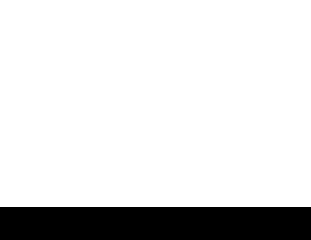

In [4]:
rr_curva = RectangularRegion(0,1,0,0.2, load("img/curva.png"))
draw(rr_curva)

Como el conjunto compacto $[0,1]^{2}$ es un punto fijo del operador de Hutchinson, sabemos que toda órbita de un compacto bajo el operador de Hutchinson converge a $[0,1]^{2}$. Pero más aun, para cada iteración obtendemos una curva que conecta al $(0,0)$ con el $(1,0)$, como podemos ver en los siguientes ejemplos:

##### Primeras 6 iteraciones del SFIH

,,,,,

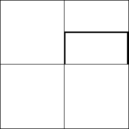
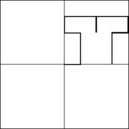
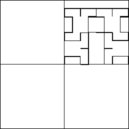
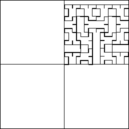
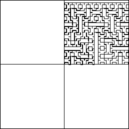
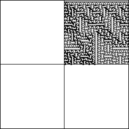

In [5]:
[draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 1, rr_curva, RectangularRegion(-1,1,-1,1,width=256, height=256)))),
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 2, rr_curva, RectangularRegion(-1,1,-1,1,width=256, height=256)))),
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 3, rr_curva, RectangularRegion(-1,1,-1,1,width=256, height=256)))),
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 4, rr_curva, RectangularRegion(-1,1,-1,1,width=256, height=256)))),
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 5, rr_curva, RectangularRegion(-1,1,-1,1,width=256, height=256)))),
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 6, rr_curva, RectangularRegion(-1,1,-1,1,width=256, height=256))))]

##### Sexta iteración en mayor resolución

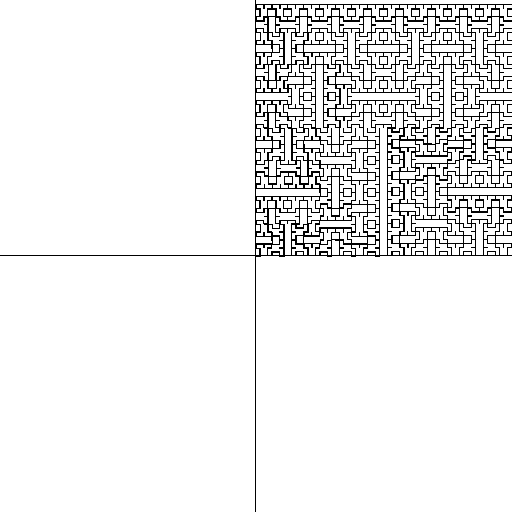

In [6]:
#Sexta iteración
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 6, rr_curva, RectangularRegion(-1,1,-1,1,width=512, height=512))))

##### Mismo sistema partiendo de una curva inicial distinta

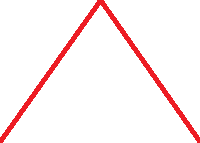

In [7]:
rr_triang = RectangularRegion(0,1,0,0.2, load("img/triang.png"))
draw(rr_triang)

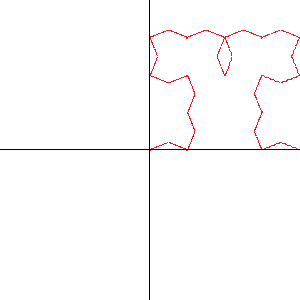

In [8]:
#segunda iteración
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 2, rr_triang, RectangularRegion(-1,1,-1,1,width=300, height=300))))

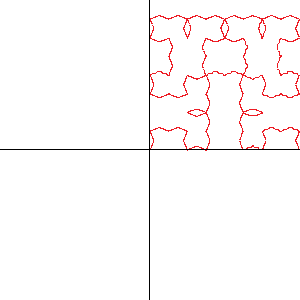

In [9]:
#tercera iteración
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 3, rr_triang, RectangularRegion(-1,1,-1,1,width=300, height=300))))

Con el SFIH construido previamente podemos encontrar una función continua $f:[0,1]\to \mathbb{R^{2}}$ tal que $f([0,1])=[0,1]^2$. Esto lo garantiza que la sucesión de compactos que define el operador de Hutchinson converge a $[0,1]^2$ en la métrica de Hausdorff. El siguiente dibujo demuestra intuitivamente que esta curva en verdad llena el espacio.

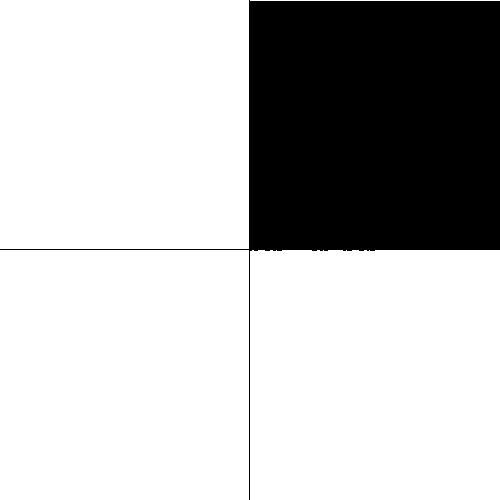

In [10]:
#décimo segunda iteración
draw(drawaxes!(drawdeterministicattractorR2(SFHI1, 12, rr_curva, RectangularRegion(-1,1,-1,1,width=500, height=500))))

### Curva de Hilbert

Ya construimos iterativamente una curva que llena el espacio. Es momento de construir recursivamente una. La siguiente curva fue propuesta por Hilbert como una de las primeras curvas que llenan el espacio. Para entenderla, lo mejor es empezar con los primeros pasos de su construcción:

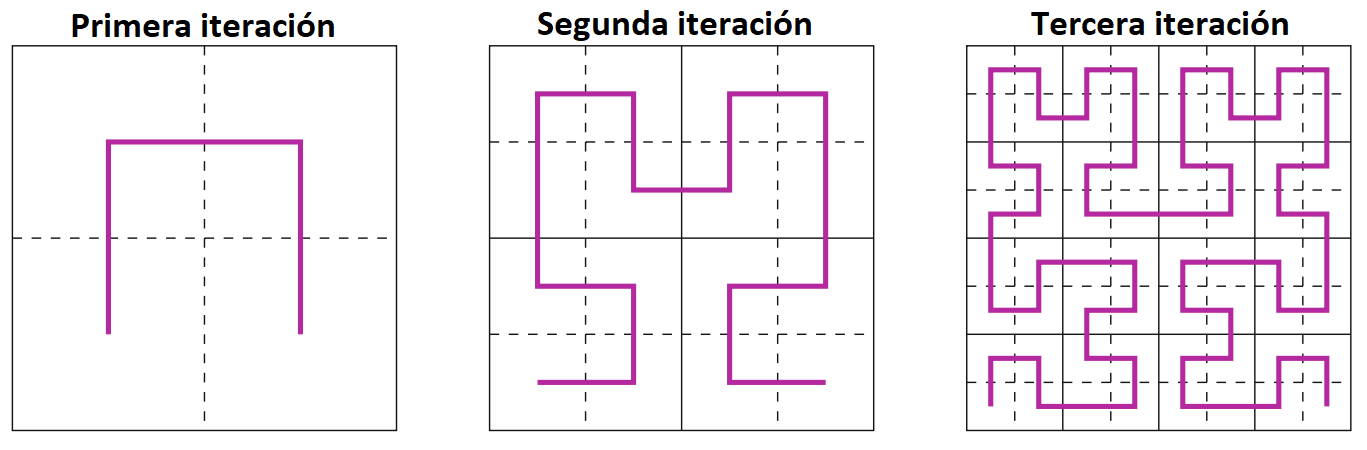

In [11]:
load("img/Hilbert123.png")

Podemos observar que hay un proceso recursivo en la creación de esta curva. Empezamos dividiendo en 4 el cuadrado unitario, de ahí unimos los puntos medios de cada cuadrante en un orden particular este orden nos define una matriz de 2x2, específicamente la matriz $\begin{pmatrix}
 2&3  \\
 1&4  \\
\end{pmatrix}$.
Para la siguiente iteración, dividimos el cuadrado unitario en 4 cuadrantes, cada uno de estos cuadrantes tendrá 4 cuadrantes a su vez, donde el cuadrante I tiene como entradas la matriz previamente obtenida, sumándole a cada entrada $\frac{2*4^{2}}{4}$. El cuadrante II tiene la matriz previamente obtenida sumándole a cada entrada $\frac{1*4^{2}}{4}$. El cuadrante III tiene la matriz previamente obtenida, pero reflejada por la diagonal perpendicular a la diagonal principal (Denotemos este tipo de transposición como $\tilde{\tau}$). El cuadrante IV es la matriz previamente obtenida, pero transpuesta y en cada entrada sumándole $\frac{3*4^{2}}{4}$.

Esto nos da un claro patrón recursivo, si en el paso $N$ obtenemos una matriz $A$, el paso $N+1$ constará de la siguiente matriz:
\begin{pmatrix}
 A+\frac{1*4^{2}}{4}&A+\frac{2*4^{2}}{4}  \\
 A^{\tilde{\tau}}&A^{\tau}+\frac{3*4^{N}}{4}  \\
\end{pmatrix}

No olvidemos que cada entrada de la matriz representa el orden en que la curva recorre los cuadrantes para llegar a ese punto, es decir, si un cuadrante tiene el número k, es porque dicho cuadrante es el k-ésimo en ser recorrido.

Podemos calcular $A^{\tilde{\tau}}$ con el siguiente código:

In [12]:
function trans2(matriz)
    k=size(matriz)[1]
    new_mat=zeros(size(matriz))
    for i=1:k
        for j=1:k

            new_mat[i,j]=matriz[k+1-j,k+1-i]

        end


    end
    return new_mat
end

trans2 (generic function with 1 method)

##### Programación de la curva de Hilbert

Empecemos creando el código para calcular la matriz de orden. Este codigo es, como era de esperarse, una función recursiva:

In [13]:
function crear_matriz_orden(num_iteraciones)
    long=Int(2^num_iteraciones) #la matriz de orden tendra dimensión (long,long)
    matriz=zeros(long,long)
    caso_base=[2 3;1 4]
    
    if num_iteraciones==1
        
        return caso_base
        
    else
        A = crear_matriz_orden(num_iteraciones-1) #paso recursivo
        
        matriz[1:Int(long/2),1:Int(long/2)]=A.+4^(num_iteraciones-1)#cuadrante arriba izquierda
        matriz[1:Int(long/2),Int(long/2)+1:Int(long)]=A.+2*4^(num_iteraciones-1)#cuadrante arriba derecha
        matriz[Int(long/2)+1:long,1:Int(long/2)]=trans2(A) #cuadrante abajo izquierda
        matriz[Int(long/2)+1:long,Int(long/2)+1:long]=transpose(A).+3*4^(num_iteraciones-1) #cuadrante abajo derecha
    end
    
    
    return matriz
end

crear_matriz_orden (generic function with 1 method)

Una vez que tenemos una matriz de orden, queremos convertir esto a un vector que nos simplifique definir la trayectoria que seguira la curva que vamos a dibujar, para eso es el siguiente código:

In [14]:
function matriz_to_vector_orden(matriz_orden)
    
    k=size(matriz_orden)[1]
    p0=[k,1] #Por construcción, el primer punto de la curva de hilbert siempre estará hasta abajo a la izquierda
    vector_orden=[]   #aquí estará la información de como se recorre la matriz
    
    for i=1:k^2-1 
    #para cada iteración checaré si el número siguiente está abajo, a la izquierda o arriba, el primer punto será [k,1]
        #en cada iteración reasignaré p0 al punto siguiente.
    
    #inicializo variables
    tauIz=0 
    tauDe=0
    tauAr=0
    tauAb=0

        if p0[1]!=k
            ##checar hacia abajo
            tauAb=matriz_orden[(p0+[1,0])[1],(p0+[1,0])[2]]
            
        end
            
        if p0[2]!=1
            ##checar hacia la izquierda
            tauIz=matriz_orden[(p0+[0,-1])[1],(p0+[0,-1])[2]]

        end
            
        if p0[2]!=k
            ##checar hacia la derecha
            tauDe=matriz_orden[(p0+[0,1])[1],(p0+[0,1])[2]]
        end
        
        if p0[1]!=1
            ##checar hacia arriba
            tauAr=matriz_orden[(p0+[-1,0])[1],(p0+[-1,0])[2]]
            
        end
        
        if tauAb==i+1
            p0=p0+[1,0]
            push!(vector_orden,"abajo")

            
        elseif tauAr==i+1 
            p0=p0+[-1,0]
            push!(vector_orden,"arriba")

            
        elseif tauIz==i+1
            p0=p0+[0,-1]
            push!(vector_orden,"izquierda")

            
        elseif tauDe==i+1
            p0=p0+[0,1]
            push!(vector_orden,"derecha")
            
        end
            
            
        
    end
    
    return vector_orden
end

matriz_to_vector_orden (generic function with 1 method)

Por último, definamos las funciones necesarias para crear un dibujo dada una matriz de orden.

In [15]:
function colorear!(matriz, p_i, p_f) 
    #Dada una matriz y dos puntos colineales de la matriz
    
    p_i=round.(Int,p_i)
    p_f=round.(Int,p_f)
    
    
    if p_i[1]==p_f[1]
        #colorear en horizontal
        if p_f[2]>p_i[2] #de izquierda a derecha
            for i=p_i[2]:p_f[2]
                matriz[p_i[1],i]=1
            end

        elseif p_f[2]<p_i[2] #de derecha a izquierda
            for i=p_f[2]:p_i[2]
               matriz[p_i[1],i]=1 
            end

        end
    elseif p_i[2]==p_f[2]
        #colorear en vertical
        if p_f[1]>p_i[1] #de abajo hacia arriba
            for i=p_i[1]:p_f[1]
                matriz[i,p_i[2]]=1

            end

        elseif p_f[1]<p_i[1] #de arriba hacia abajo
            for i=p_f[1]:p_i[1] 
                matriz[i,p_i[2]]=1

            end
        end

    end
end

function coloreo_dado_orden(iteracion,vec_orden,lenIm=256)
    #Los elementos de vec_orden deben ser "arriba","abajo","izquierda","derecha"
    #Si la longitud de la imagen es muy pequeña, puede no funcionar el código, también se recomienda que sea potencia de 2
    longitud_imagen=lenIm
    curva=zeros(longitud_imagen,longitud_imagen)  
    iter=iteracion
    orden=vec_orden
    total=4^iter

    distancia=1/2^iter
    p0=([longitud_imagen,1]+longitud_imagen*[-0.5*distancia,0.5*distancia])
    puntos=[p0]
    for i in orden
    #Para cada iteración, coloreare una distancia hacia la dirección que indica el vector de orden
        if i=="arriba"
            p0=p0+longitud_imagen*[-distancia,0]
            push!(puntos,p0)

        elseif i=="derecha"
            p0=p0+longitud_imagen*[0,distancia]
            push!(puntos,p0)

        elseif i=="abajo"
            p0=p0+longitud_imagen*[distancia,0]
            push!(puntos,p0)

        elseif i=="izquierda"
            p0=p0+longitud_imagen*[0,-distancia]
            push!(puntos,p0)


        end
    end

    for i=1:total-1
       colorear!(curva,puntos[i],puntos[i+1]) 

    end

    Gray.(curva)
    
end

coloreo_dado_orden (generic function with 2 methods)

Ensamblemos todas las piezas y pongamos a prueba nuestro código

In [16]:
function CurvaHilbert(iteraciones,tamano=512)#tamaño tiene que ser potencia de 2, y suficientemente grande
    coloreo_dado_orden(iteraciones,matriz_to_vector_orden(crear_matriz_orden(iteraciones)),tamano)
end

CurvaHilbert (generic function with 2 methods)

##### Primera iteración

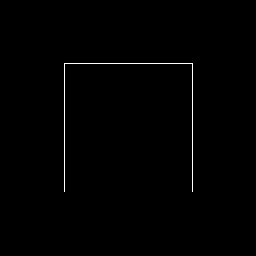

In [17]:
CurvaHilbert(1,256)

##### Segunda iteración

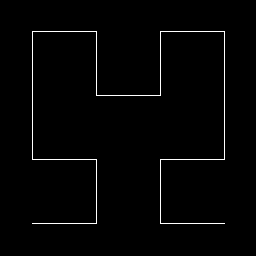

In [18]:
CurvaHilbert(2,256)

##### Tercera iteración

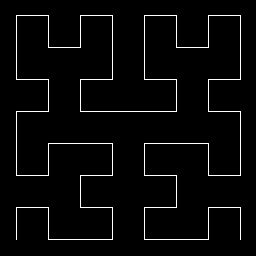

In [19]:
CurvaHilbert(3,256)

##### Cuarta iteración

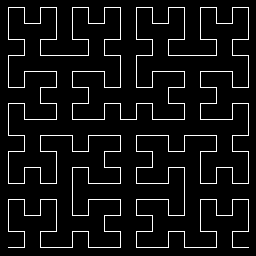

In [20]:
CurvaHilbert(4,256)

##### Quinta iteración

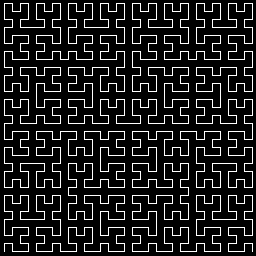

In [21]:
CurvaHilbert(5,256)

##### Sexta iteración

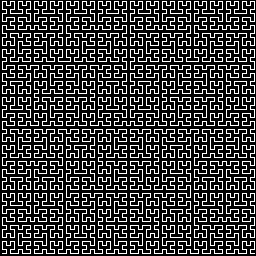

In [22]:
CurvaHilbert(6,256)

##### Séptima iteración

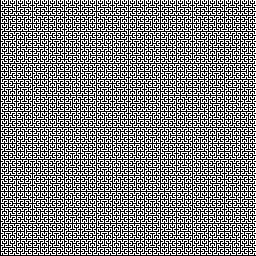

In [23]:
CurvaHilbert(7,256)

### Conclusiones sobre la curva de Hilbert

De momento hemos visto solo iteraciones de la curva de hilbert, sin embargo, la curva de Hilbert, intuitivamente, es el resultado de llevar este proceso al infinito. Como podemos observar, para cada iteración, la curva se aproxima a llenar el cuadrado. Sin embargo, ¿cómo sabemos que en verdad esta curva es sobreyectiva?

Esto lo podemos deducir del hecho de que cada punto en el cuadrado puede ser aproximado por una sucesión de subcuadrados anidados, y como el espacio es Compacto, esta sucesión converge al único punto que es precisamente el cual define la función de la curva de Hilbert.

### Observaciones adicionales

¿Es la curva de hilbert un fractal? Esto dependerá de la definición que se tenga de fractal. En definitiva es en cierto sentido autosimilar pues fue construida de esa forma. Pero si pensamos que la curva es la función, entonces no tiene, de primeras y bajo nuestra base teórica inicial, mucho sentido hablar de funciones fractales. Por otro lado, ¿es la imagen de la función un fractal? Claramente es el atractator de un SFIH, pero, no olvidemos lo que acabamos de demostrar, ¡la imagen de la función es precisamente el cuadrado unitario! cuya dimensión topológica es 2 al igual que su dimensión fractal. Su frontera tiene dimensión topológica 1, lo mismo que su dimensión fractal. Por lo tanto, no cumple ese requerimiento de la definición de fractal.

Algo que es importante de observar es que el código hace mucho énfasis en que la matriz donde se dibuje sea de dimensión $(2^n,2^n)$, por lo que si la dimensión donde se dibuja es distinta, pueden obtenerse curvas parecidas a la de hilbert, pero geométricamente distintas:

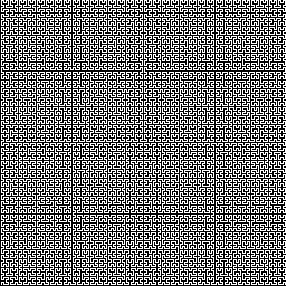

In [24]:
CurvaHilbert(7,286)

In [25]:
# Fin

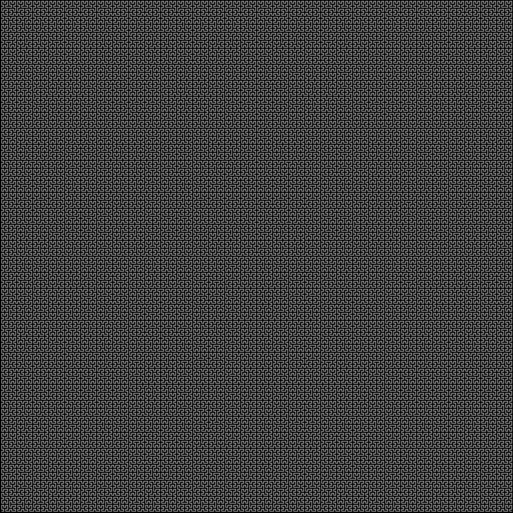

In [30]:
CurvaHilbert(8,1024)